# 미분과 도함수
  - 함수의 순간 평균값

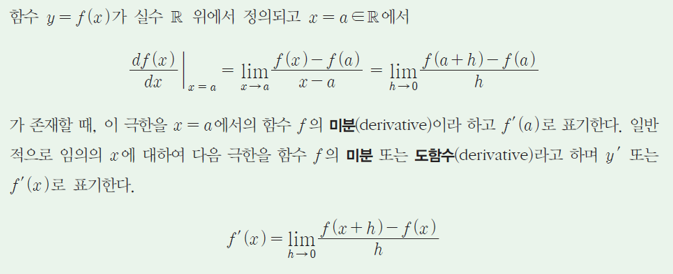

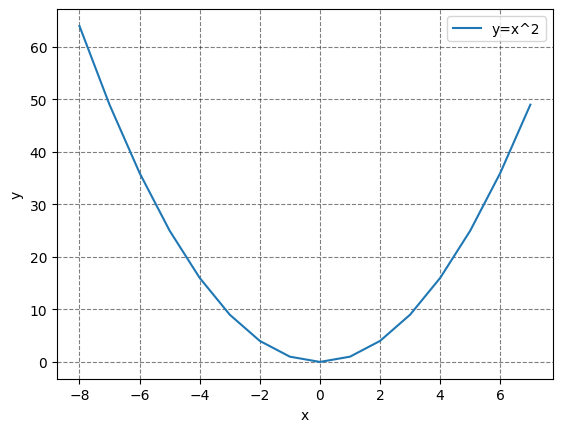

In [2]:
# y = x^2
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(-8,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='black', alpha=0.5, linestyle='--')

plt.plot(x, x**2, label='y=x^2')
plt.legend()
plt.show()



In [4]:
import sympy as sp
# 함수 f(x)를 정의
x = sp.symbols('x')
f = sp.exp(x)  # f(x) = e^x

# sympy를 사용해서 f(x),의 미분을 구해
f_prime = sp.diff(f, x)

# 특정 점 a에서의 접선의 기울기
a = 1  # 점 x=1
temp = f_prime.subs(x, a)
print(f"{a}에서 접선의 기울기 : {temp}")
print(x)


1에서 접선의 기울기 : E
x


In [8]:
y = x**2
y_prim = sp.diff(y, x)
y_prim

2*x

In [10]:
# 특정점 a = 1 접선의 기울기
a = 1
y_prim.subs(x, a)

4

In [15]:
import sympy as sp
# 1. 함수 정의  y= x^2
x = sp.symbols('x')
y = x**3 + x**2 + x + 1
# 2. sympy를 이용해서 y의 미분을 구한다
y_prim = sp.diff(y, x)
print(f"함수 y=x^2의 미분 : {y_prim}")
# 3. 특정점 a = 1 접선의 기울기
a = 1
slope_at_a =  y_prim.subs(x, a)
print(f"{a}에서 접선의 기울기 : {slope_at_a}")


함수 y=x^2의 미분 : 3*x**2 + 2*x + 1
1에서 접선의 기울기 : 6


# 머신러닝 > 딥러닝(신경망)
  - 사이킷런 : 기 작성된 모듈을 이용해서 구현 - 데이터만 있으면 됨
  - 파이토치 : 처음부터 구현(사용자 의지대로 구현) - 모델도 구현해야 함(딥러닝)
  - MLOps( 오픈소스)
    - 데이터 정재부터 모델선택 및 결과.. 자동으로 해결
    - 파이프라인 형식으로 구현
  - 도커 & 쿠버네티스로 구현. .배포 및 관리가 편하다.

데이터수집 -> 데이터 전처리 -> 훈련/테스트 데이터 분할 -> 모델구축&학습-> 모델평가 -> 실제 데이터에 대한 분석 결과 도출